# **Importing Required Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style= 'darkgrid')

## **Loading the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## **Exploratory Data Analysis**

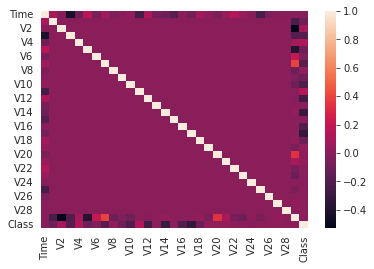

In [ ]:
corr = df.corr()
sns.heatmap(corr);

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

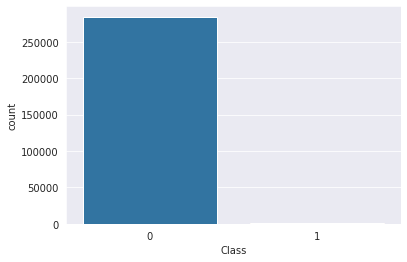

In [ ]:
sns.countplot(data = df, x = 'Class');

Observation: As we can see there is a large Imbalance in the Class Data

In [ ]:
#Seperating Labels and Columns

y=df.iloc[:,[-1]] 
X=df.drop(y.columns,axis = 1)

In [ ]:
#Train test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227845, 30) (56962, 30) (227845, 1) (56962, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#y_test = y_test.ravel()
#y_train = y_train.ravel()

In [ ]:
# import SMOTE module from imblearn library
#SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point.
#The synthetic points are added between the chosen point and its neighbors.

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)



print('After applying smote X_train: {}\n'.format(X_train.shape))
print('After applying smote y_train: {}\n'.format(y_train.shape))

print("After applying smote label '1': {}\n".format(sum(y_train == 1)))
print("After applying smote label '0': {}\n".format(sum(y_train == 0)))

After applying smote X_train: (454908, 30)

After applying smote y_train: (454908,)

After applying smote label '1': 227454

After applying smote label '0': 227454



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()
classifier.add(Dense(10, activation = 'relu', input_dim = 30))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(1,  activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20)


# Predicting the Test set results
y_pred = classifier.predict(X_test).round()
y_pred = (y_pred > 0.5)

Epoch 1/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0116 - accuracy: 0.9974
Epoch 2/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9974
Epoch 3/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9976
Epoch 4/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9976
Epoch 5/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0100 - accuracy: 0.9978
Epoch 6/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9979
Epoch 7/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0094 - accuracy: 0.9979
Epoch 8/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 9/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.9981
Epoch 10/20
455/455 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9982

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test).round()
y_pred = (y_pred > 0.5)

In [ ]:
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score, classification_report
print('classification_report:',classification_report(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.33      0.86      0.48       101

    accuracy                           1.00     56962
   macro avg       0.67      0.93      0.74     56962
weighted avg       1.00      1.00      1.00     56962

f1_score: 0.4806629834254143
precision_score: 0.3333333333333333
recall_score: 0.8613861386138614


In [ ]:
#find accuracy
from sklearn.metrics import accuracy_score
print('ANN Accuracy:',accuracy_score(y_test,y_pred))

ANN Accuracy: 0.9966995540886907
